# AI4Impact Datathon: Energy Consumption Dataset

# 1. Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
import matplotlib.dates as mdates
import math
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# 2. Importing the dataset, sorting, renaming columns

In [2]:
df=pd.read_csv("modify_data.csv",header=None,index_col=0,parse_dates=True)

In [3]:
df

,1,2,3,4,5,6,7,8
0,,,,,,,,
2014-07-24 12:30:00,499.248,22.0,21.0,19.0,-,4.0,7.0,12.0
2014-07-24 12:45:00,530.257,21.0,21.0,19.0,-,4.0,7.0,12.0
2014-07-24 13:00:00,477.542,21.0,21.8,19.0,-,4.0,7.0,13.0
2014-07-24 13:15:00,463.587,22.0,21.8,19.0,-,4.0,7.0,13.0
2014-07-24 13:30:00,395.367,22.0,21.8,19.0,-,4.0,7.0,13.0
...,...,...,...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,24.0,25.0,22.0,-,4.0,5.0,19.0
2016-05-26 19:30:00,1581.469,24.0,25.0,22.0,-,4.0,5.0,19.0
2016-05-26 19:45:00,784.533,24.0,25.0,22.0,-,4.0,5.0,19.0


In [4]:
df=df.sort_index()
df

,1,2,3,4,5,6,7,8
0,,,,,,,,
2014-07-24 12:30:00,499.248,22.0,21.0,19.0,-,4.0,7.0,12.0
2014-07-24 12:45:00,530.257,21.0,21.0,19.0,-,4.0,7.0,12.0
2014-07-24 13:00:00,477.542,21.0,21.8,19.0,-,4.0,7.0,13.0
2014-07-24 13:15:00,463.587,22.0,21.8,19.0,-,4.0,7.0,13.0
2014-07-24 13:30:00,395.367,22.0,21.8,19.0,-,4.0,7.0,13.0
...,...,...,...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,24.0,25.0,22.0,-,4.0,5.0,19.0
2016-05-26 19:30:00,1581.469,24.0,25.0,22.0,-,4.0,5.0,19.0
2016-05-26 19:45:00,784.533,24.0,25.0,22.0,-,4.0,5.0,19.0


In [5]:
df.columns=["Consumption", "Sensor1", "Sensor2", "Sensor3", "Sensor4","Weekday", "Month", "Hour"]
df

,Consumption,Sensor1,Sensor2,Sensor3,Sensor4,Weekday,Month,Hour
0,,,,,,,,
2014-07-24 12:30:00,499.248,22.0,21.0,19.0,-,4.0,7.0,12.0
2014-07-24 12:45:00,530.257,21.0,21.0,19.0,-,4.0,7.0,12.0
2014-07-24 13:00:00,477.542,21.0,21.8,19.0,-,4.0,7.0,13.0
2014-07-24 13:15:00,463.587,22.0,21.8,19.0,-,4.0,7.0,13.0
2014-07-24 13:30:00,395.367,22.0,21.8,19.0,-,4.0,7.0,13.0
...,...,...,...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,24.0,25.0,22.0,-,4.0,5.0,19.0
2016-05-26 19:30:00,1581.469,24.0,25.0,22.0,-,4.0,5.0,19.0
2016-05-26 19:45:00,784.533,24.0,25.0,22.0,-,4.0,5.0,19.0


# 3. Checking whether Sensor 4 is necessary 

In [6]:
df['Sensor4'].value_counts()

-    64544
Name: Sensor4, dtype: int64

In [7]:
print(df[df['Sensor1']<-6])
print(df[df['Sensor2']<-6])
print(df[df['Sensor3']<-6])

Empty DataFrame
Columns: [Consumption, Sensor1, Sensor2, Sensor3, Sensor4, Weekday, Month, Hour]
Index: []
Empty DataFrame
Columns: [Consumption, Sensor1, Sensor2, Sensor3, Sensor4, Weekday, Month, Hour]
Index: []
Empty DataFrame
Columns: [Consumption, Sensor1, Sensor2, Sensor3, Sensor4, Weekday, Month, Hour]
Index: []


## CONCLUSION 1: We checked the minimun temperatures of the 4 sensors. Sensors 1-3 did not give any value below -6 degree celsius. While Sensor 4 had majoriuty temperature entries till -56 degree celsius. Sensor 4 in general had very less values given as well (around 2K while others had around 50K)

In [8]:
df=df.replace('-',np.NaN)
df['Sensor4']=df['Sensor4'].astype('float64')

In [9]:
df.corr()  

,Consumption,Sensor1,Sensor2,Sensor3,Sensor4,Weekday,Month,Hour
Consumption,1.000000,-0.309349,-0.304700,-0.338431,NaN,0.042165,-0.288007,0.042686
Sensor1,-0.309349,1.000000,0.991285,0.986770,NaN,0.004855,0.212195,0.155466
Sensor2,-0.304700,0.991285,1.000000,0.983712,NaN,-0.002298,0.205937,0.182876
Sensor3,-0.338431,0.986770,0.983712,1.000000,NaN,0.004063,0.224959,0.156677
Sensor4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekday,0.042165,0.004855,-0.002298,0.004063,NaN,1.000000,-0.007985,0.000161
Month,-0.288007,0.212195,0.205937,0.224959,NaN,-0.007985,1.000000,0.000220
Hour,0.042686,0.155466,0.182876,0.156677,NaN,0.000161,0.000220,1.000000


## CONCLUSION 2: From the sensors we noticed that the temperatures are really low. The correlation between the energy consumption and sensor data is negative. Which implies that if the temperature is low, the energy consumption is high. Which makes sense since there maybe a use of heaters, a cold place.

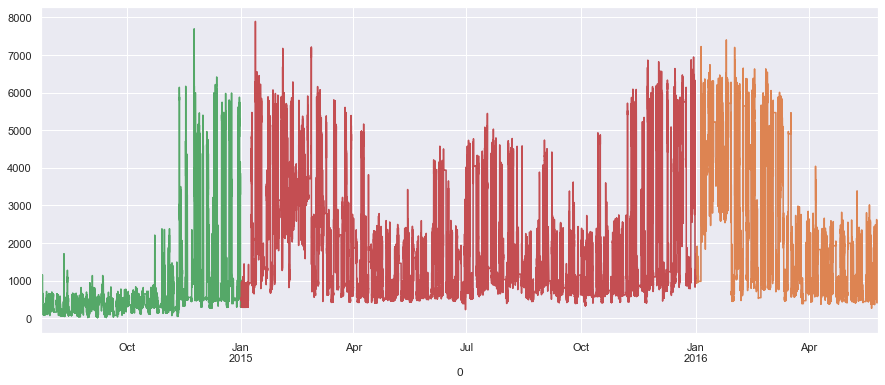

In [10]:
sns.set(rc={'figure.figsize':(15, 6)})
df['Consumption'].plot(linewidth=0.5);
for i in {2014,2015,2016}:    
    ax = df.loc[str(i), 'Consumption'].plot()

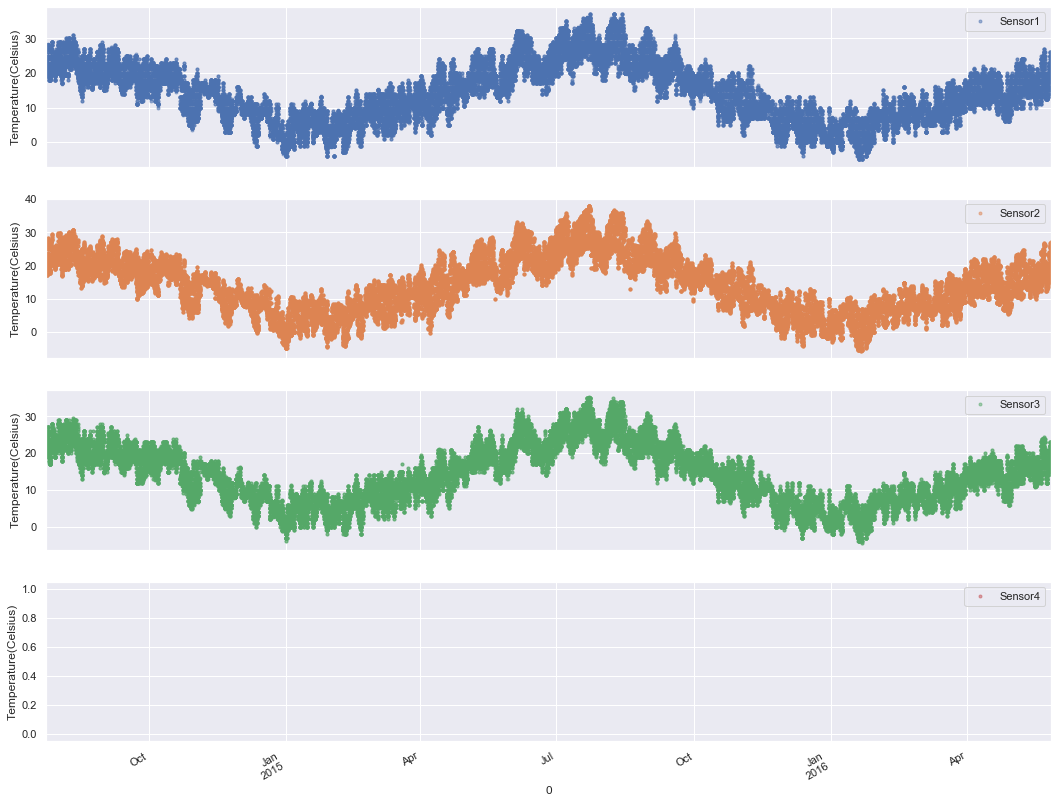

In [11]:
cols_plot = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']
#y_lab=['Energy','Temperature(Celsius)', 'Temperature(Celsius)','Temperature(Celsius)','Temperature(Celsius)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
i=0
for ax in axes:
    ax.set_ylabel("Temperature(Celsius)")
   # i=i+1

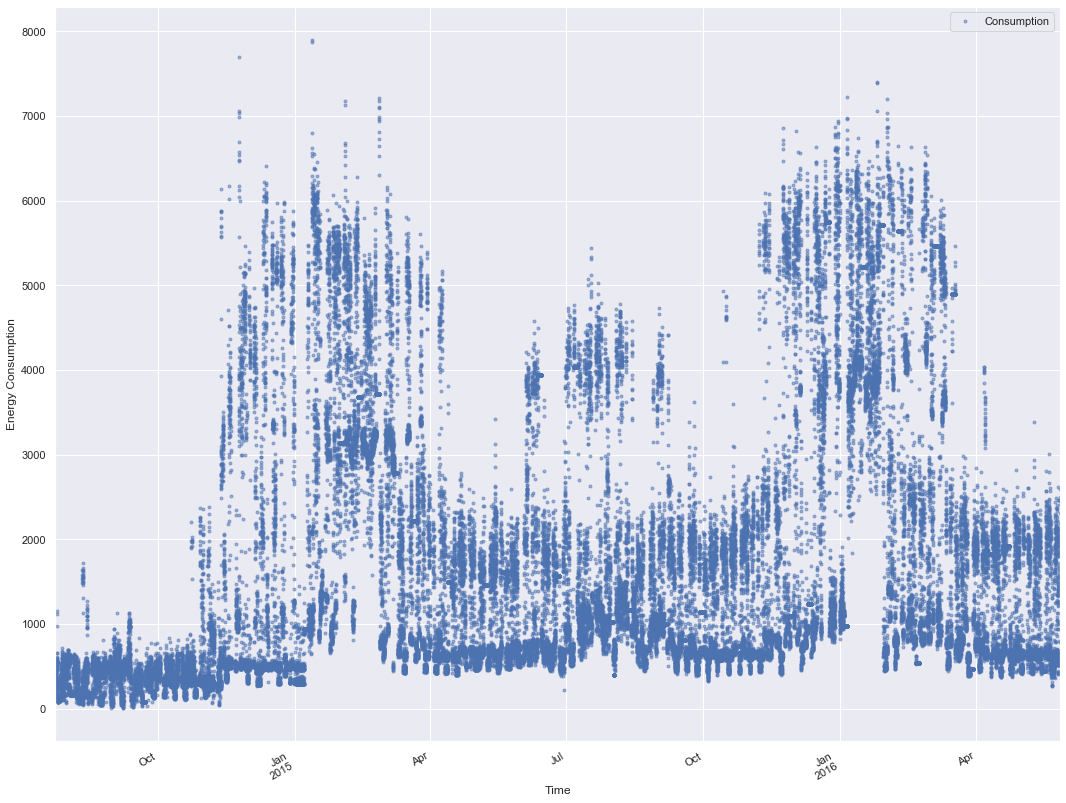

In [12]:
cols_plot = ['Consumption']
#y_lab=['Energy','Temperature(Celsius)', 'Temperature(Celsius)','Temperature(Celsius)','Temperature(Celsius)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
i=0
for ax in axes:
    ax.set_ylabel("Energy Consumption")
    ax.set_xlabel("Time")
   # i=i+1

## CONCLUSION 3: When we plotted the temperaturs graphs among the 4 sensors, sensor 1-3 show a similar pattern, while sensor 4 is extremely different.

# Final Conclusion: Thus, Sensor 4 was dropped

In [13]:
df=df.drop(columns=["Sensor4"])

In [14]:
df

,Consumption,Sensor1,Sensor2,Sensor3,Weekday,Month,Hour
0,,,,,,,
2014-07-24 12:30:00,499.248,22.0,21.0,19.0,4.0,7.0,12.0
2014-07-24 12:45:00,530.257,21.0,21.0,19.0,4.0,7.0,12.0
2014-07-24 13:00:00,477.542,21.0,21.8,19.0,4.0,7.0,13.0
2014-07-24 13:15:00,463.587,22.0,21.8,19.0,4.0,7.0,13.0
2014-07-24 13:30:00,395.367,22.0,21.8,19.0,4.0,7.0,13.0
...,...,...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,24.0,25.0,22.0,4.0,5.0,19.0
2016-05-26 19:30:00,1581.469,24.0,25.0,22.0,4.0,5.0,19.0
2016-05-26 19:45:00,784.533,24.0,25.0,22.0,4.0,5.0,19.0


## Now, the average of Sensor 1, 2, 3 was added into the dataframe and Sensor 1, 2, 3 was dropped

In [15]:
df["Average_temp"]= (df["Sensor1"]+df["Sensor2"]+df["Sensor3"])/3
df.Average_temp= df.Average_temp.round(2)

In [16]:
df

,Consumption,Sensor1,Sensor2,Sensor3,Weekday,Month,Hour,Average_temp
0,,,,,,,,
2014-07-24 12:30:00,499.248,22.0,21.0,19.0,4.0,7.0,12.0,20.67
2014-07-24 12:45:00,530.257,21.0,21.0,19.0,4.0,7.0,12.0,20.33
2014-07-24 13:00:00,477.542,21.0,21.8,19.0,4.0,7.0,13.0,20.60
2014-07-24 13:15:00,463.587,22.0,21.8,19.0,4.0,7.0,13.0,20.93
2014-07-24 13:30:00,395.367,22.0,21.8,19.0,4.0,7.0,13.0,20.93
...,...,...,...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,24.0,25.0,22.0,4.0,5.0,19.0,23.67
2016-05-26 19:30:00,1581.469,24.0,25.0,22.0,4.0,5.0,19.0,23.67
2016-05-26 19:45:00,784.533,24.0,25.0,22.0,4.0,5.0,19.0,23.67


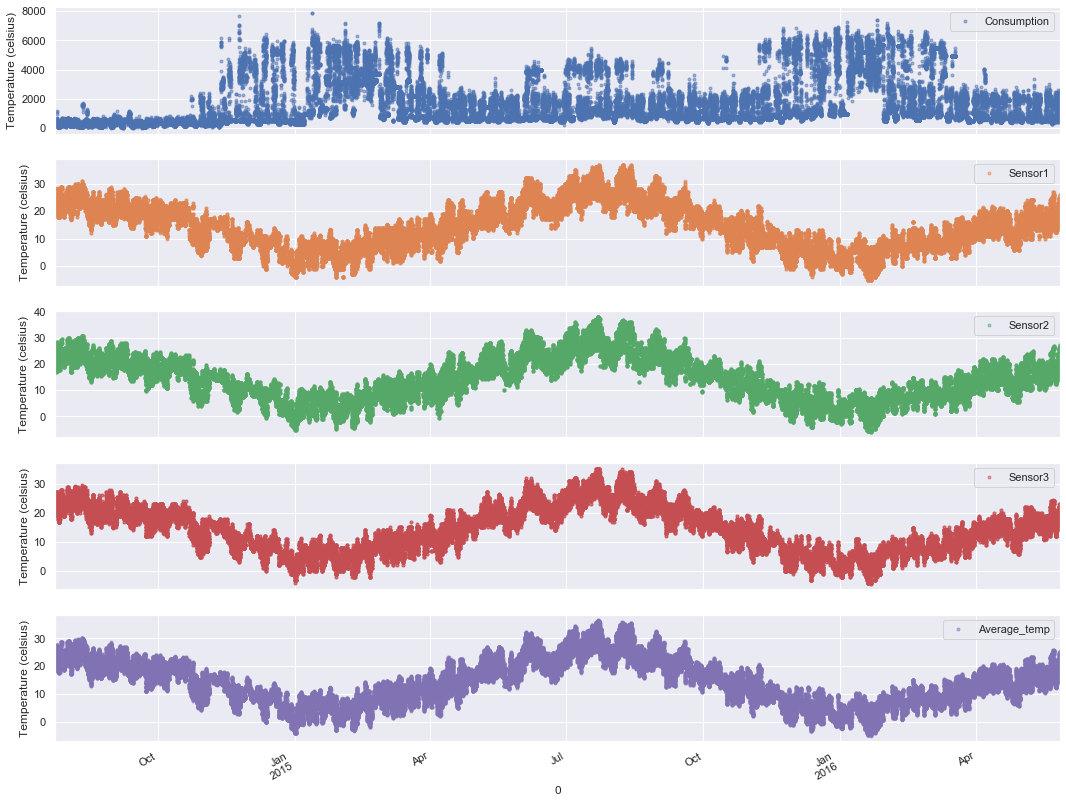

In [17]:
cols_plot = ['Consumption', 'Sensor1', 'Sensor2', 'Sensor3', 'Average_temp']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Temperature (celsius)')

In [18]:
df=df.drop(columns=["Sensor1", "Sensor2", "Sensor3"])
df

,Consumption,Weekday,Month,Hour,Average_temp
0,,,,,
2014-07-24 12:30:00,499.248,4.0,7.0,12.0,20.67
2014-07-24 12:45:00,530.257,4.0,7.0,12.0,20.33
2014-07-24 13:00:00,477.542,4.0,7.0,13.0,20.60
2014-07-24 13:15:00,463.587,4.0,7.0,13.0,20.93
2014-07-24 13:30:00,395.367,4.0,7.0,13.0,20.93
...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,4.0,5.0,19.0,23.67
2016-05-26 19:30:00,1581.469,4.0,5.0,19.0,23.67
2016-05-26 19:45:00,784.533,4.0,5.0,19.0,23.67


# 4. Adding Public Holidays

In [19]:
df_1=pd.read_csv("modify_data.csv",header=None,index_col=None)

In [20]:
df_1

,0,1,2,3,4,5,6,7,8
0,07/24/2014 12:30,499.248,22.0,21.0,19.0,-,4.0,7.0,12.0
1,07/24/2014 12:45,530.257,21.0,21.0,19.0,-,4.0,7.0,12.0
2,07/24/2014 13:00,477.542,21.0,21.8,19.0,-,4.0,7.0,13.0
3,07/24/2014 13:15,463.587,22.0,21.8,19.0,-,4.0,7.0,13.0
4,07/24/2014 13:30,395.367,22.0,21.8,19.0,-,4.0,7.0,13.0
...,...,...,...,...,...,...,...,...,...
64539,05/26/2016 19:15,1821.790,24.0,25.0,22.0,-,4.0,5.0,19.0
64540,05/26/2016 19:30,1581.469,24.0,25.0,22.0,-,4.0,5.0,19.0
64541,05/26/2016 19:45,784.533,24.0,25.0,22.0,-,4.0,5.0,19.0
64542,05/26/2016 20:00,541.110,23.8,24.0,21.7,-,4.0,5.0,20.0


In [21]:
df_date=pd.DataFrame(df_1[0].str.slice(0,10))
df_date

,0
0,07/24/2014
1,07/24/2014
2,07/24/2014
3,07/24/2014
4,07/24/2014
...,...
64539,05/26/2016
64540,05/26/2016
64541,05/26/2016
64542,05/26/2016


In [22]:
public_holiday=pd.read_csv('public_holidays.txt', header = None)
public_holiday[0].astype(str)

0     01/01/2014
1     01/06/2014
2     04/21/2014
3     04/25/2014
4     05/01/2014
5     06/02/2014
6     08/15/2014
7     11/01/2014
8     12/08/2014
9     12/25/2014
10    12/26/2014
11    01/01/2015
12    01/06/2015
13    04/06/2015
14    04/25/2015
15    05/01/2015
16    06/02/2015
17    08/15/2015
18    11/01/2015
19    12/08/2015
20    12/25/2015
21    12/26/2015
22    01/01/2016
23    01/06/2016
24    03/28/2016
25    04/25/2016
26    05/01/2016
27    06/02/2016
28    08/15/2016
29    11/01/2016
30    12/08/2016
31    12/25/2016
32    12/26/2016
Name: 0, dtype: object

In [23]:
pub_list=list(public_holiday[0])
pub_list

['01/01/2014',
 '01/06/2014',
 '04/21/2014',
 '04/25/2014',
 '05/01/2014',
 '06/02/2014',
 '08/15/2014',
 '11/01/2014',
 '12/08/2014',
 '12/25/2014',
 '12/26/2014',
 '01/01/2015',
 '01/06/2015',
 '04/06/2015',
 '04/25/2015',
 '05/01/2015',
 '06/02/2015',
 '08/15/2015',
 '11/01/2015',
 '12/08/2015',
 '12/25/2015',
 '12/26/2015',
 '01/01/2016',
 '01/06/2016',
 '03/28/2016',
 '04/25/2016',
 '05/01/2016',
 '06/02/2016',
 '08/15/2016',
 '11/01/2016',
 '12/08/2016',
 '12/25/2016',
 '12/26/2016']

In [24]:
df_date=df_date.astype(str)
df_date['public_holiday']=0
df_date

,0,public_holiday
0,07/24/2014,0
1,07/24/2014,0
2,07/24/2014,0
3,07/24/2014,0
4,07/24/2014,0
...,...,...
64539,05/26/2016,0
64540,05/26/2016,0
64541,05/26/2016,0
64542,05/26/2016,0


In [25]:
df_date['public_holiday'] = df_date[0].apply(lambda x: 1 if x in pub_list else 0)

In [26]:
df_date['public_holiday'].unique()
df_date

,0,public_holiday
0,07/24/2014,0
1,07/24/2014,0
2,07/24/2014,0
3,07/24/2014,0
4,07/24/2014,0
...,...,...
64539,05/26/2016,0
64540,05/26/2016,0
64541,05/26/2016,0
64542,05/26/2016,0


In [27]:
pub=pd.DataFrame(df_date['public_holiday'])
pub

,public_holiday
0,0
1,0
2,0
3,0
4,0
...,...
64539,0
64540,0
64541,0
64542,0


In [28]:
df_1=pd.concat([df_1,pub],axis=1).reindex()

In [29]:
df_1.head()

,0,1,2,3,4,5,6,7,8,public_holiday
0,07/24/2014 12:30,499.248,22.0,21.0,19.0,-,4.0,7.0,12.0,0
1,07/24/2014 12:45,530.257,21.0,21.0,19.0,-,4.0,7.0,12.0,0
2,07/24/2014 13:00,477.542,21.0,21.8,19.0,-,4.0,7.0,13.0,0
3,07/24/2014 13:15,463.587,22.0,21.8,19.0,-,4.0,7.0,13.0,0
4,07/24/2014 13:30,395.367,22.0,21.8,19.0,-,4.0,7.0,13.0,0


In [30]:
df_1.set_index(0, inplace=True)

In [31]:
df_1

,1,2,3,4,5,6,7,8,public_holiday
0,,,,,,,,,
07/24/2014 12:30,499.248,22.0,21.0,19.0,-,4.0,7.0,12.0,0
07/24/2014 12:45,530.257,21.0,21.0,19.0,-,4.0,7.0,12.0,0
07/24/2014 13:00,477.542,21.0,21.8,19.0,-,4.0,7.0,13.0,0
07/24/2014 13:15,463.587,22.0,21.8,19.0,-,4.0,7.0,13.0,0
07/24/2014 13:30,395.367,22.0,21.8,19.0,-,4.0,7.0,13.0,0
...,...,...,...,...,...,...,...,...,...
05/26/2016 19:15,1821.790,24.0,25.0,22.0,-,4.0,5.0,19.0,0
05/26/2016 19:30,1581.469,24.0,25.0,22.0,-,4.0,5.0,19.0,0
05/26/2016 19:45,784.533,24.0,25.0,22.0,-,4.0,5.0,19.0,0


In [32]:
df["Is_public_holiday"]=df_1["public_holiday"]

In [33]:
df

,Consumption,Weekday,Month,Hour,Average_temp,Is_public_holiday
0,,,,,,
2014-07-24 12:30:00,499.248,4.0,7.0,12.0,20.67,0
2014-07-24 12:45:00,530.257,4.0,7.0,12.0,20.33,0
2014-07-24 13:00:00,477.542,4.0,7.0,13.0,20.60,0
2014-07-24 13:15:00,463.587,4.0,7.0,13.0,20.93,0
2014-07-24 13:30:00,395.367,4.0,7.0,13.0,20.93,0
...,...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,4.0,5.0,19.0,23.67,0
2016-05-26 19:30:00,1581.469,4.0,5.0,19.0,23.67,0
2016-05-26 19:45:00,784.533,4.0,5.0,19.0,23.67,0


In [34]:
df['Year']=df.index.year
df['Date']=df.index.day
df.head()

,Consumption,Weekday,Month,Hour,Average_temp,Is_public_holiday,Year,Date
0,,,,,,,,
2014-07-24 12:30:00,499.248,4.0,7.0,12.0,20.67,0,2014,24
2014-07-24 12:45:00,530.257,4.0,7.0,12.0,20.33,0,2014,24
2014-07-24 13:00:00,477.542,4.0,7.0,13.0,20.60,0,2014,24
2014-07-24 13:15:00,463.587,4.0,7.0,13.0,20.93,0,2014,24
2014-07-24 13:30:00,395.367,4.0,7.0,13.0,20.93,0,2014,24


In [35]:
df_2015_2016=df[(df['Year']==2015)|(df['Year']==2016)]
df_2014_dec=df[(df['Year']==2014)&(df['Month']==12.0)]
df_2014_nov=df[(df['Year']==2014)&(df['Month']==11.0)&(df['Date']>=24)]
df=pd.concat([df_2014_nov,df_2014_dec,df_2015_2016],axis=0).reindex()

In [36]:
df.drop(columns=['Year',"Date"])

,Consumption,Weekday,Month,Hour,Average_temp,Is_public_holiday
0,,,,,,
2014-11-24 00:00:00,1111.680,1.0,11.0,0.0,5.47,0
2014-11-24 00:15:00,1131.836,1.0,11.0,0.0,5.47,0
2014-11-24 00:30:00,1086.872,1.0,11.0,0.0,5.13,0
2014-11-24 00:45:00,1102.377,1.0,11.0,0.0,4.80,0
2014-11-24 01:00:00,1063.615,1.0,11.0,1.0,4.73,0
...,...,...,...,...,...,...
2016-05-26 19:15:00,1821.790,4.0,5.0,19.0,23.67,0
2016-05-26 19:30:00,1581.469,4.0,5.0,19.0,23.67,0
2016-05-26 19:45:00,784.533,4.0,5.0,19.0,23.67,0


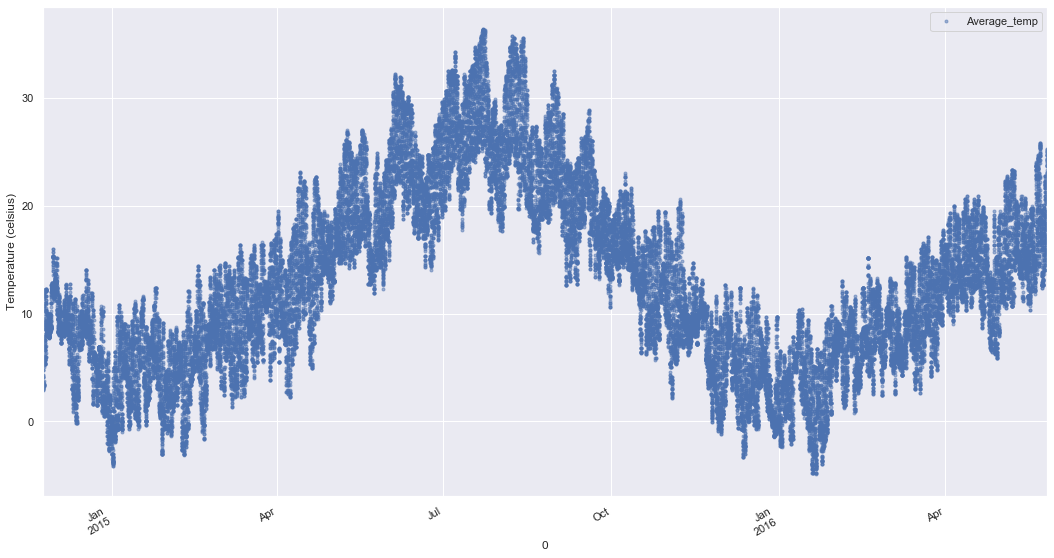

In [39]:
cols_plot = ['Average_temp']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Temperature (celsius)')

In [36]:
df.to_csv("ready_data.csv")

# 5. Checking trends

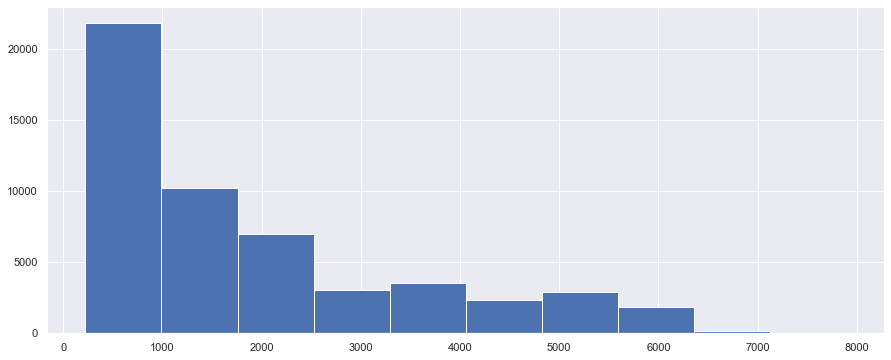

In [40]:
df['Consumption'].hist()

## This is the Energy Consumption V/S Frequency of usage in a duration of 15 mins

## A) Following are the boxplots for the weekdays, months, years, and hours

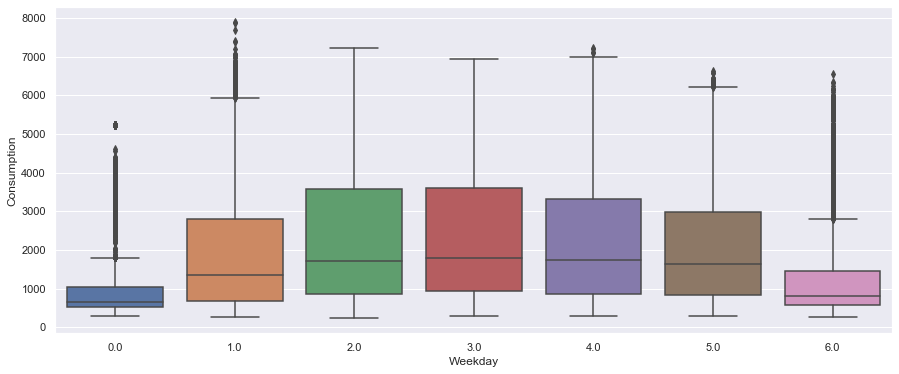

In [41]:
sns.boxplot(data=df, x='Weekday', y='Consumption');

## We notice that Saturday(6) and Sunday(0) have lower energy consumptions compared to the other weekdays

In [42]:
df['Weekday'].value_counts() #from smojo function

3.0    7584
2.0    7584
1.0    7584
4.0    7570
6.0    7488
5.0    7488
0.0    7488
Name: Weekday, dtype: int64

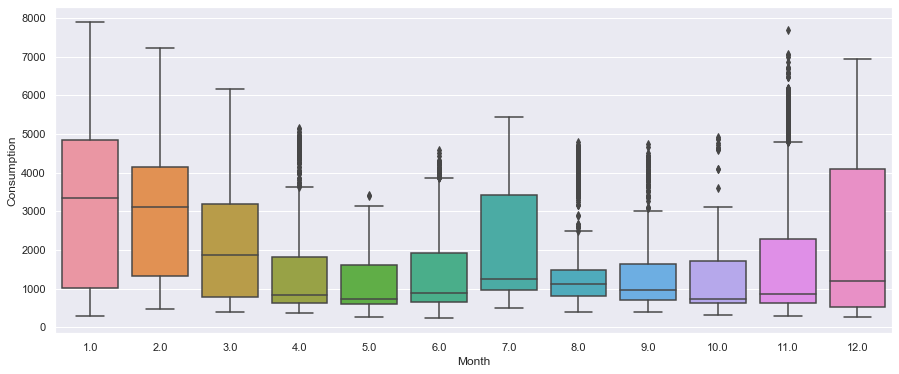

In [43]:
sns.boxplot(data=df, x='Month', y='Consumption')

## Consumption is higher in 1,2,12- winter months, possibly due to usage of heaters due to cold. Also see a slight rise in month 7

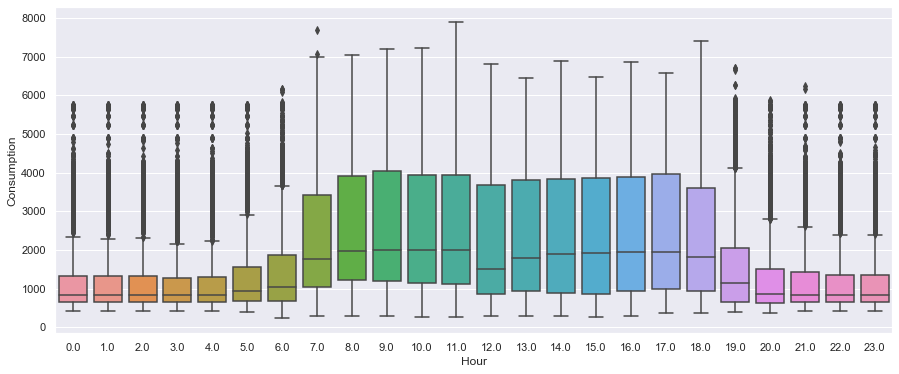

In [44]:
sns.boxplot(data=df, x='Hour', y='Consumption')

## A higher energy consumption is noticed during the working hours of the day, ie from 8:00-17:00

## B) Following are the timeseries for yearly, monthly trends

## Following is the yearwise time series plots

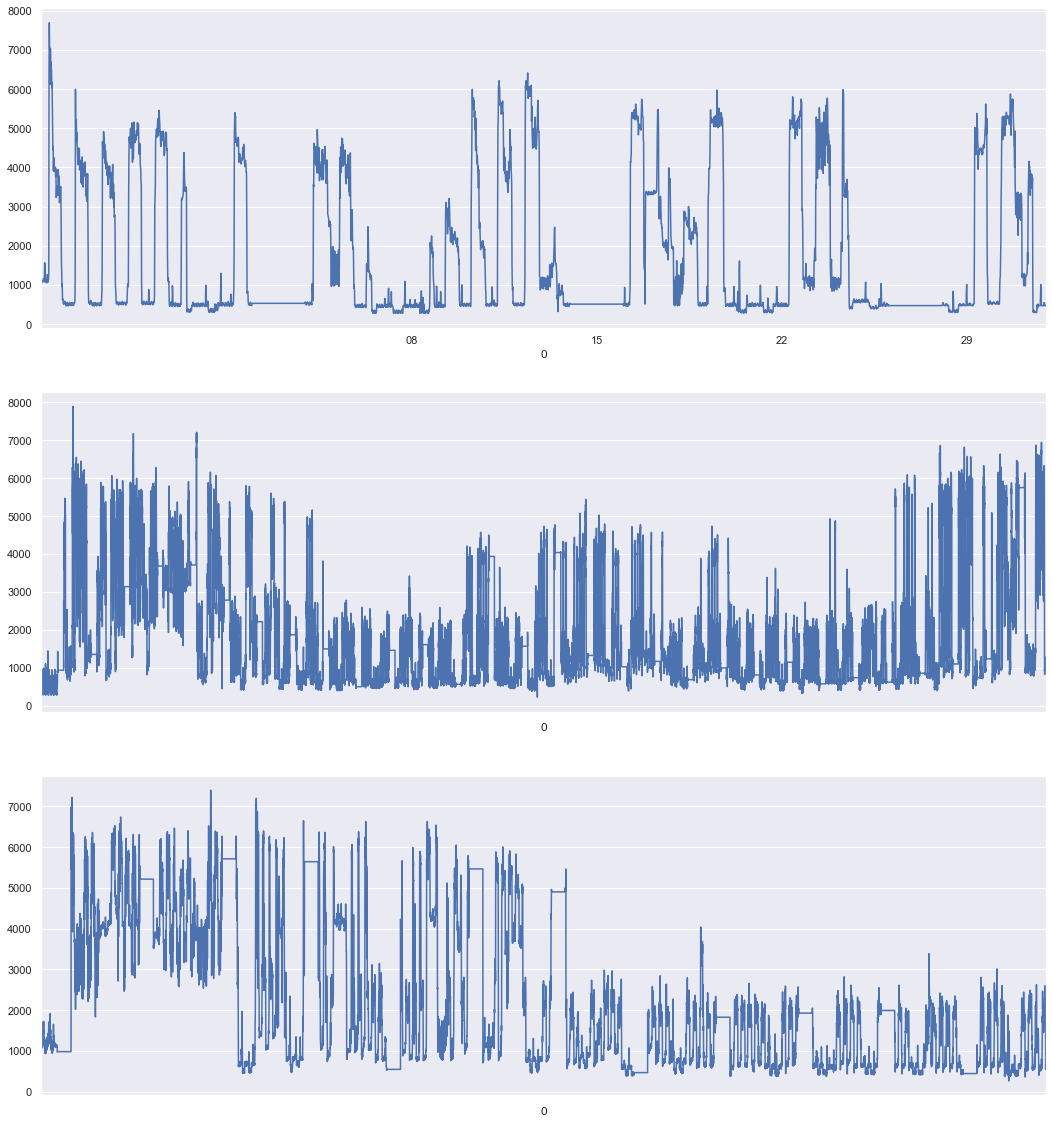

In [45]:
fig,axes=plt.subplots(3,1,figsize=(18,20))
count=0
for i in [2014,2015,2016]:
    df.loc[str(i), 'Consumption'].plot(ax=axes[count])
    axes[count].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    count+=1

## Following is the monthwise time series plots- 2014, 2015, 2016

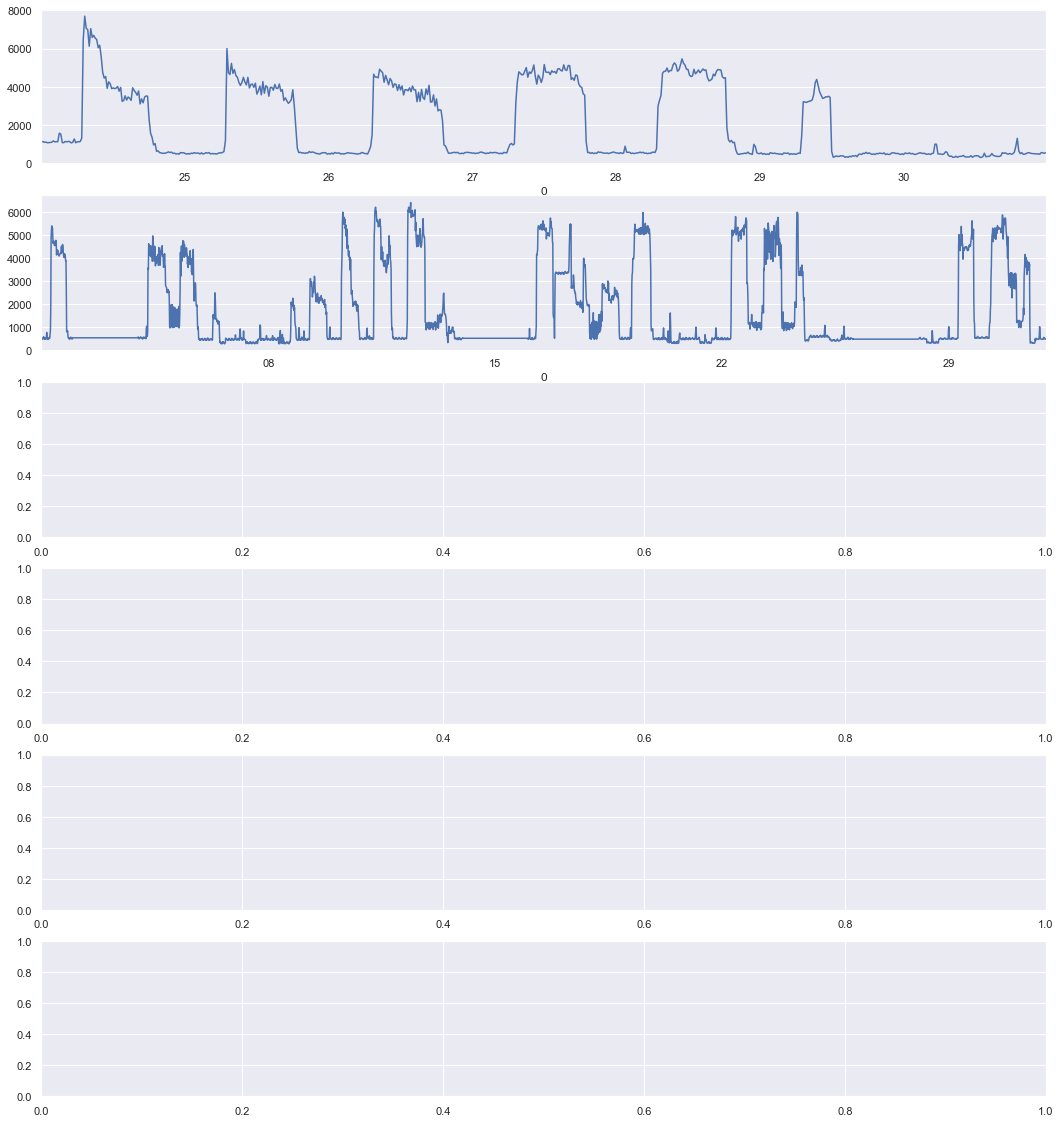

In [46]:
fig,axes=plt.subplots(6,1,figsize=(18,20))
count=0
for i in ['11', '12']:
    df.loc['2014-'+i, 'Consumption'].plot(ax=axes[count])
    axes[count].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    count+=1

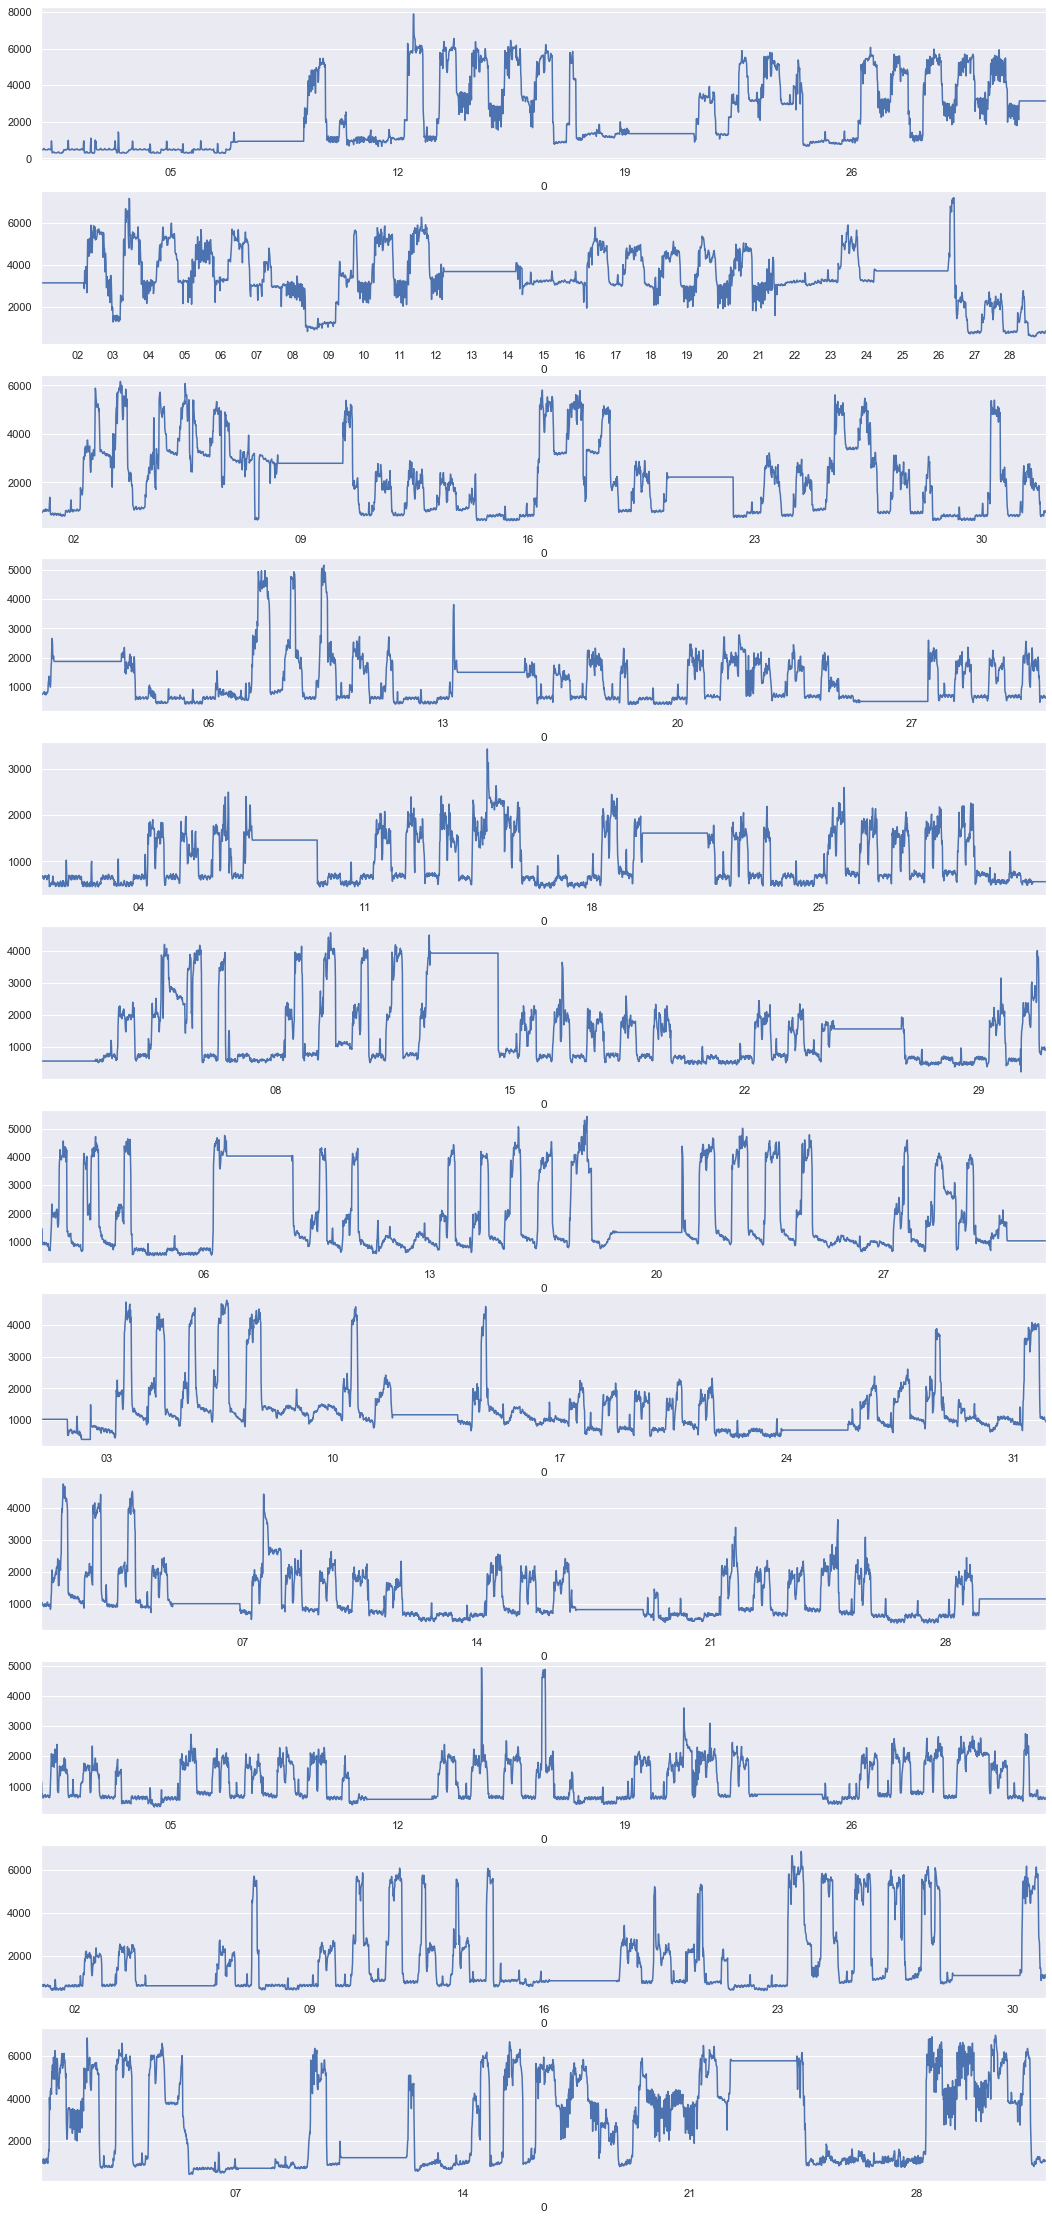

In [47]:
fig,axes=plt.subplots(12,1,figsize=(18,40))
count=0
for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    df.loc['2015-'+i, 'Consumption'].plot(ax=axes[count])
    axes[count].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    count+=1

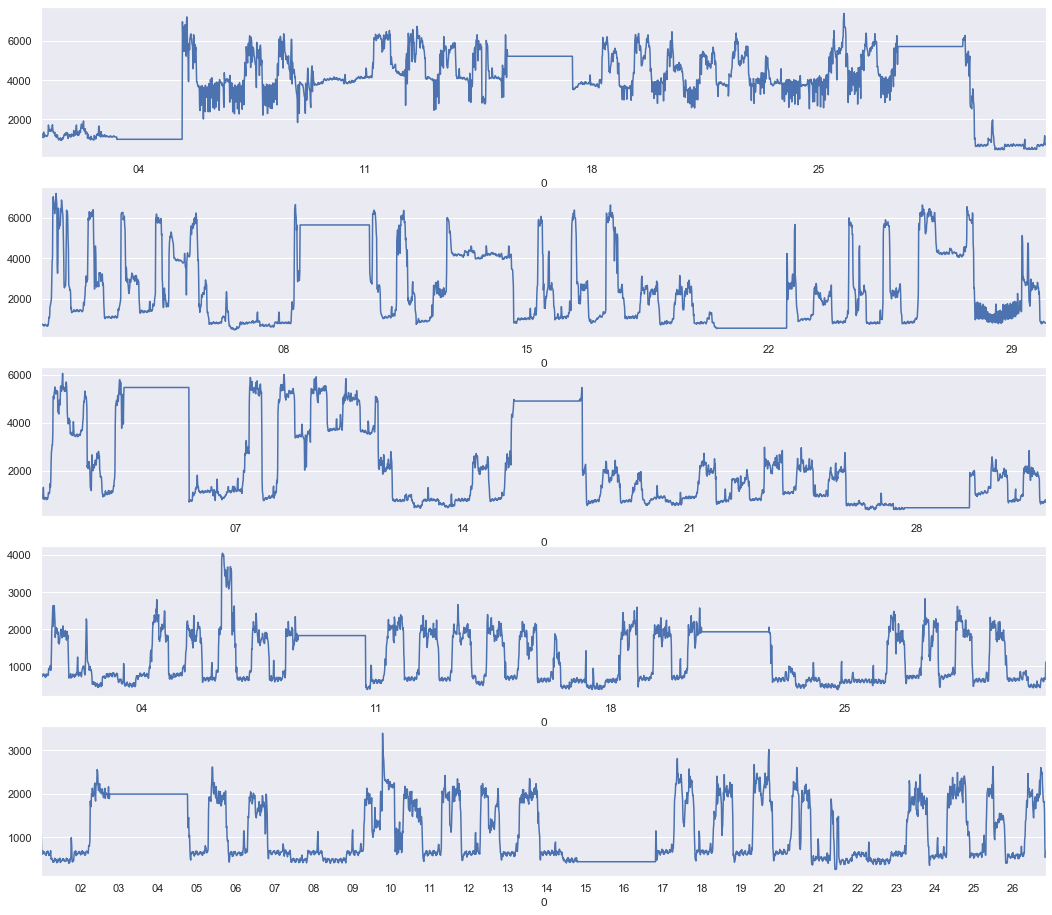

In [48]:
fig,axes=plt.subplots(5,1,figsize=(18,16))
count=0
for i in ['01', '02', '03', '04', '05']:
    df.loc['2016-'+i, 'Consumption'].plot(ax=axes[count])
    axes[count].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    count+=1

# 6. Analysis

## A) Autocorrelation:

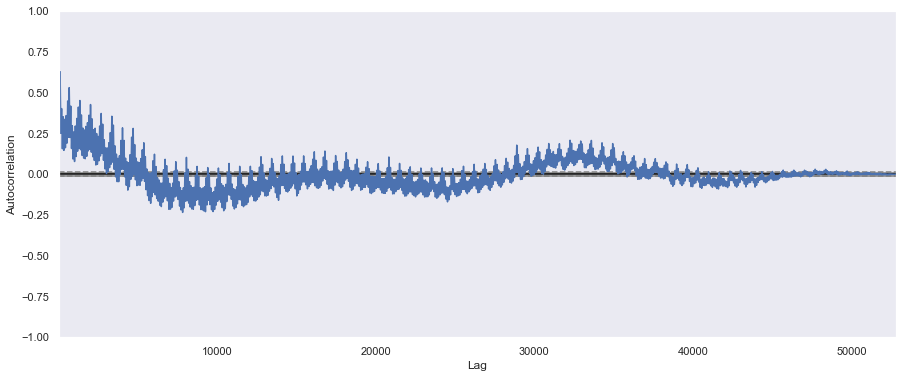

In [49]:
pd.plotting.autocorrelation_plot(df['Consumption'])

## Autocorrelation is the similarity between observations as a function of the time lag between them. A good autocorrelation is the one which is plotted away from trhe axis at 0

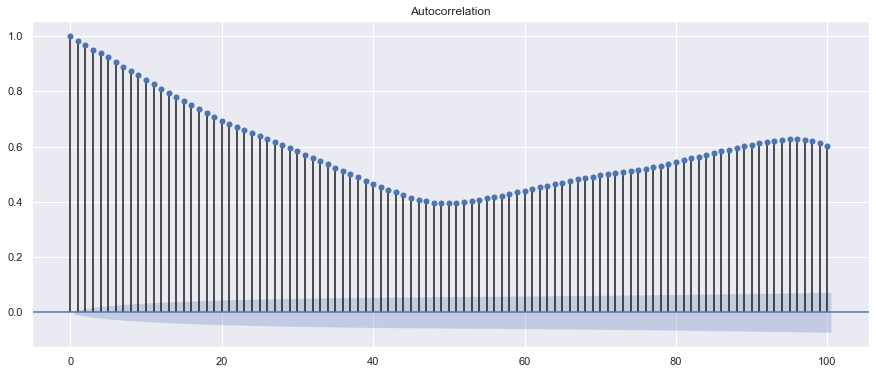

In [50]:
plot_acf(df['Consumption'],lags=100)
plt.show()

## Autocorrelation is plotted in a different format above. It shows that as long as the lollipop is marked above the blue area, it is considered a good correlation, whether above or below.

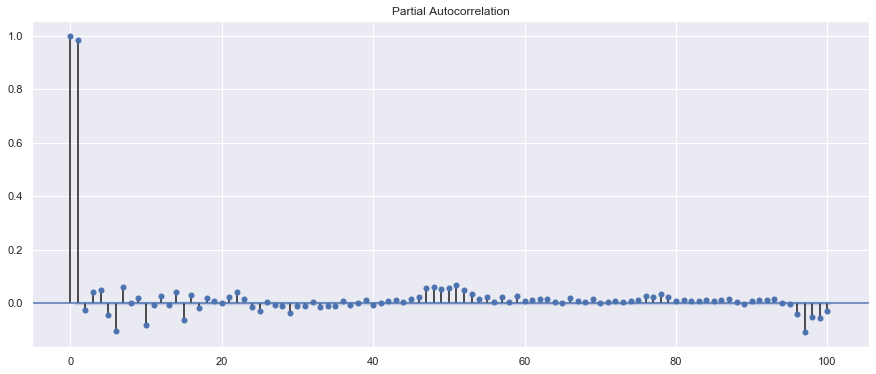

In [51]:
plot_pacf(df['Consumption'], lags=100)
plt.show()

## Partial autocorrelation is plotted above. The lollipop right after the 0th lollipop shows the highest correlation. In the rest, the as long as the lollipop is marked above the blue area, it is considered a good correlation, whether above or below.

## B) Timeseries Trend, Seasonality and Residual

In [52]:
decom_df=pd.DataFrame(df['Consumption'])
decom_df

,Consumption
0,
2014-11-24 00:00:00,1111.680
2014-11-24 00:15:00,1131.836
2014-11-24 00:30:00,1086.872
2014-11-24 00:45:00,1102.377
2014-11-24 01:00:00,1063.615
...,...
2016-05-26 19:15:00,1821.790
2016-05-26 19:30:00,1581.469
2016-05-26 19:45:00,784.533


In [53]:
decomposition_mult = seasonal_decompose(decom_df, model='multiplicative',freq=2880)
decomposition_add = seasonal_decompose(decom_df, model='additive',freq=2880)

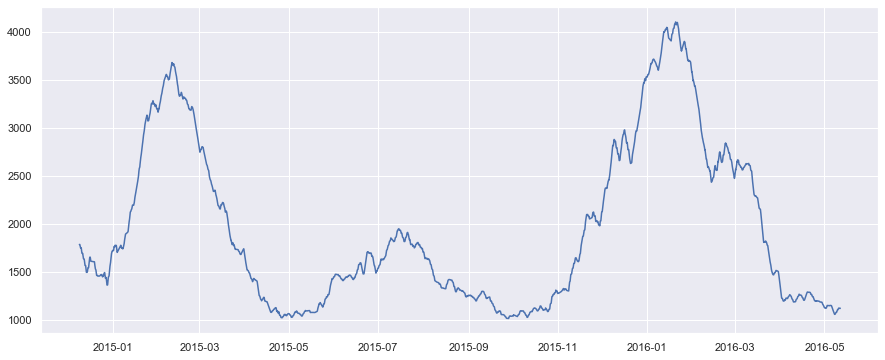

In [54]:
plt.plot(decomposition_add.trend)

## The yearly trend (2014-2016) 

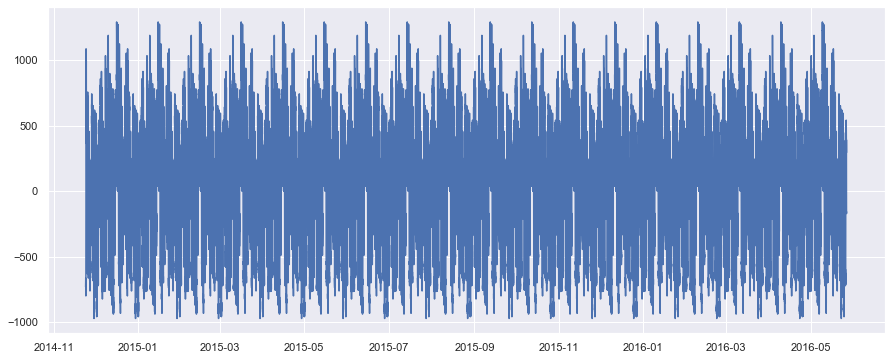

In [55]:
plt.plot(decomposition_add.seasonal)

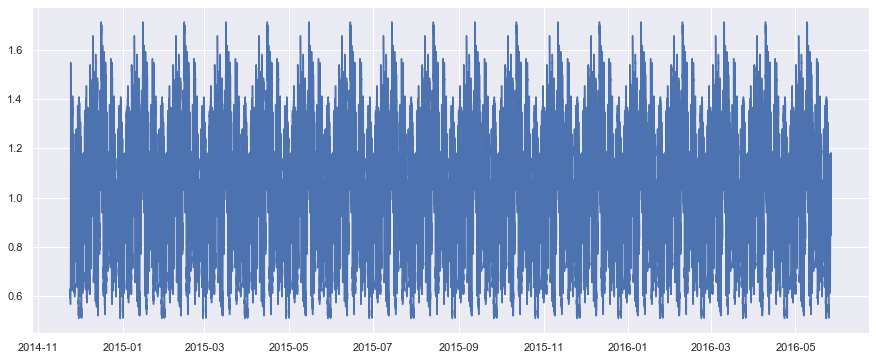

In [56]:
plt.plot(decomposition_mult.seasonal)

## Here, we plotted both the additive and the multiplicative seasonality above.
## We can conclude that othe given model is an additive model. This is because the amplitude of the seasonal component is relatively constant over time. If the model was multiplicative, the amplitude of the seasonal component would increase over time.

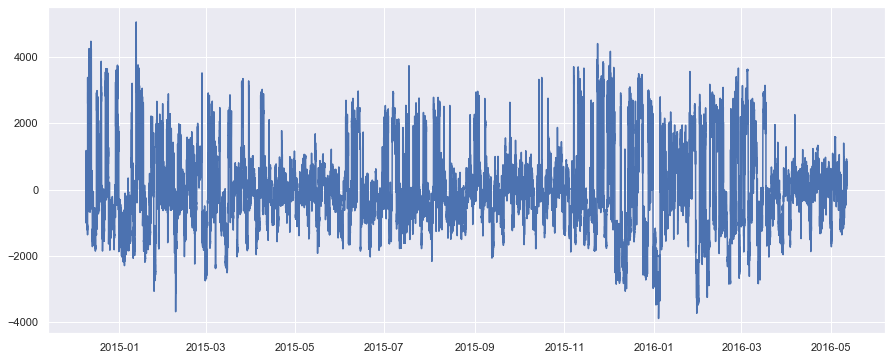

In [57]:
plt.plot(decomposition_add.resid)

## The residual component of the timeseries